# Heart Disease Prediction using Logistic Regression
The Framingham Heart Study (FHS) is dedicated to identifying common factors or characteristics that contribute to cardiovascular disease (CVD). In 1948, an original cohort of 5,209 men and women between 30 and 62 years old were recruited from Framingham, MA. An Offspring Cohort began in 1971, an Omni Cohort in 1994, a Third Generation Cohort in 2002, a New Offspring Spouse Cohort in 2004 and a Second Generation Omni Cohort in 2003. Core research in the dataset focuses on cardiovascular and cerebrovascular diseases. The data include biological specimens, molecular genetic data, phenotype data, samples, images, participant vascular functioning data, physiological data, demographic data, and ECG data.It is a collaborative project of the National Heart, Lung and Blood Institute and Boston University.

Predict 10 year risk of coronary heart disease (binary: “1:Yes”, “0:No”)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
df=pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.shape

(4238, 16)

In [7]:
df.apply(lambda x:sum(x.isnull()))

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df.apply(lambda x:len(x.unique()))

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1364
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [10]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5,test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print (precision)
f1_score=2*(precision*recall)/(precision+recall)
print(f1_score)

[[617   6]
 [ 98  11]]
0.862937062937063
0.9903691813804173
0.9222720478325859


## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor(random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

m=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print (precision)
f1_score=2*(precision*recall)/(precision+recall)
print(f1_score)

[[617   6]
 [ 98  11]]
0.862937062937063
0.9903691813804173
0.9222720478325859


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
recall = cm[0][0]/(cm[0][0] + cm[1][0])
print(recall)
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print (precision)
f1_score=2*(precision*recall)/(precision+recall)
print(f1_score)

[[617   6]
 [103   6]]
0.8569444444444444
0.9903691813804173
0.9188384214445271


## Data Visualization

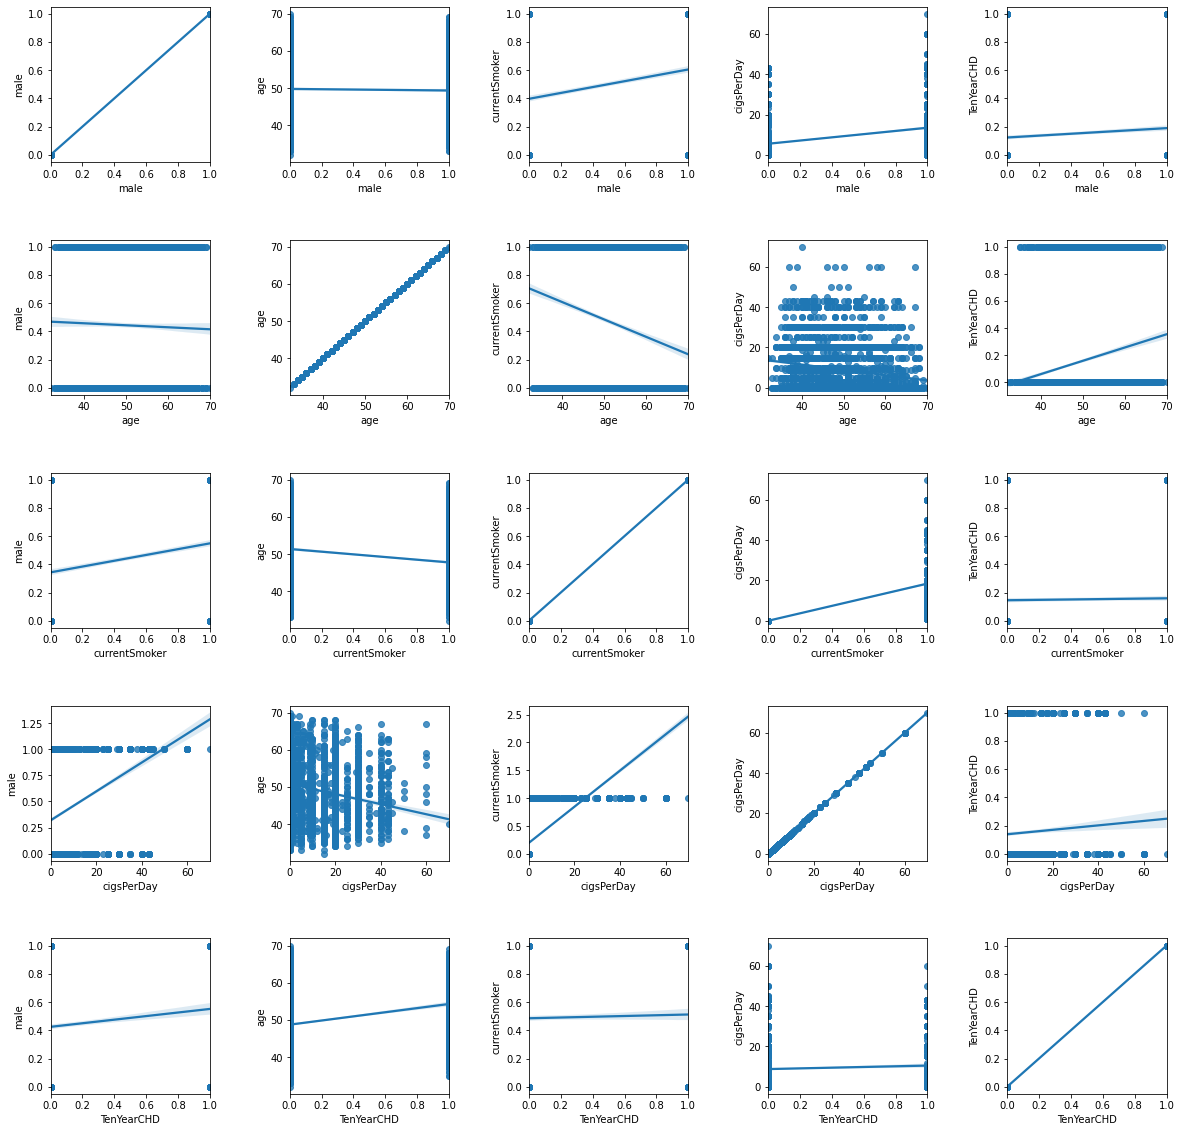

In [22]:
# Relation between male,age,currentSmoker,cigsPerDay,TenYearCHD
plt.figure(figsize=(20,20))
n=0
for x in ['male','age','currentSmoker','cigsPerDay','TenYearCHD']:
    for y in ['male','age','currentSmoker','cigsPerDay','TenYearCHD']:
        n+=1
        plt.subplot(5,5,n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

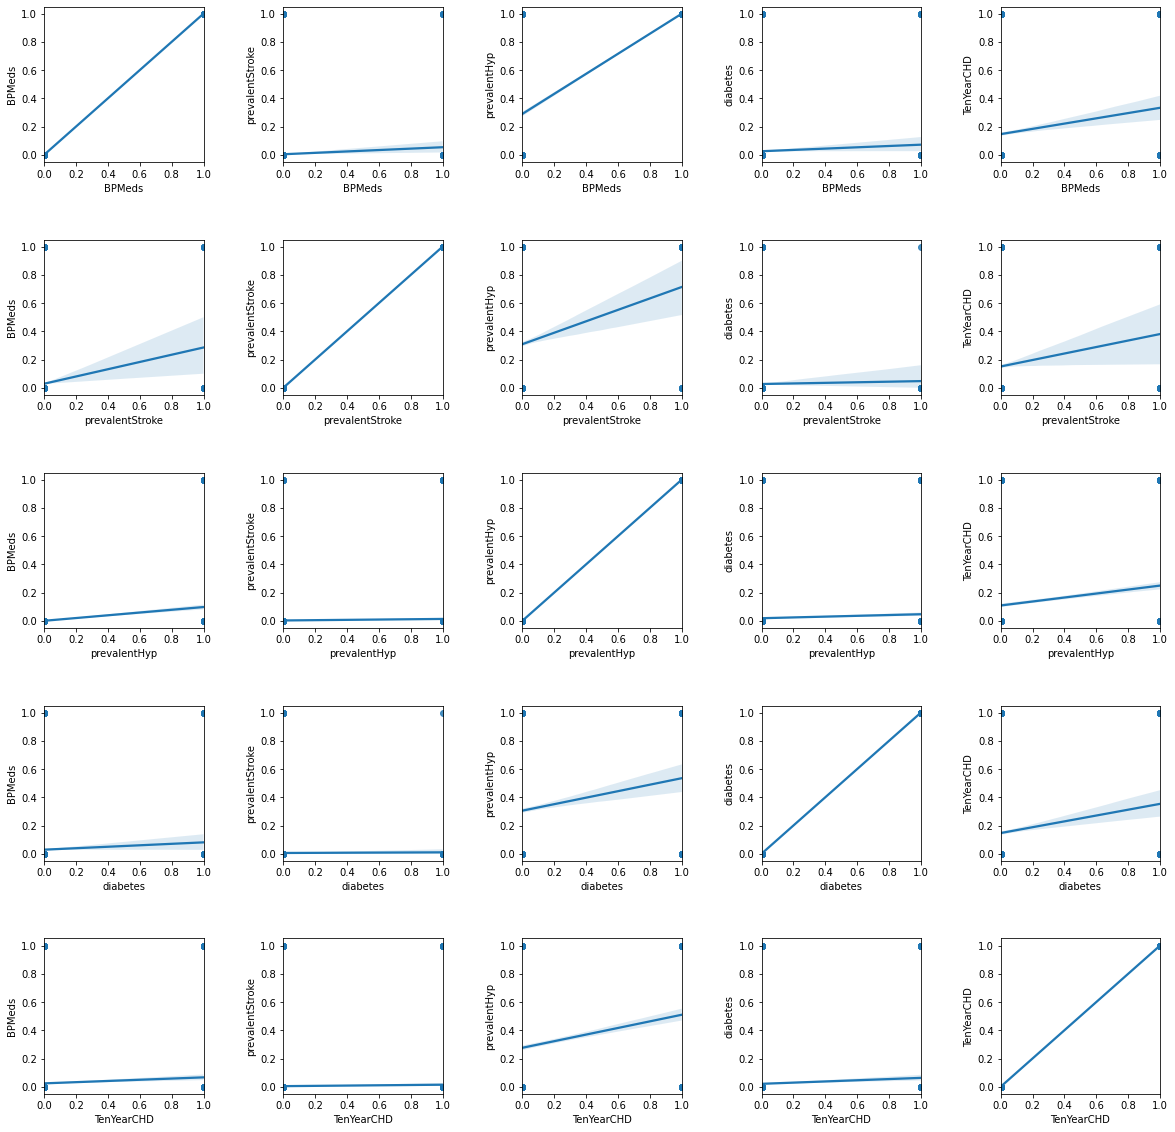

In [23]:
# Relation between BPMeds,prevalentStroke,pevalentHyp,diabetes,TenYearCHD
plt.figure(figsize=(20,20))
n=0
for x in ['BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']:
    for y in ['BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']:
        n+=1
        plt.subplot(5,5,n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

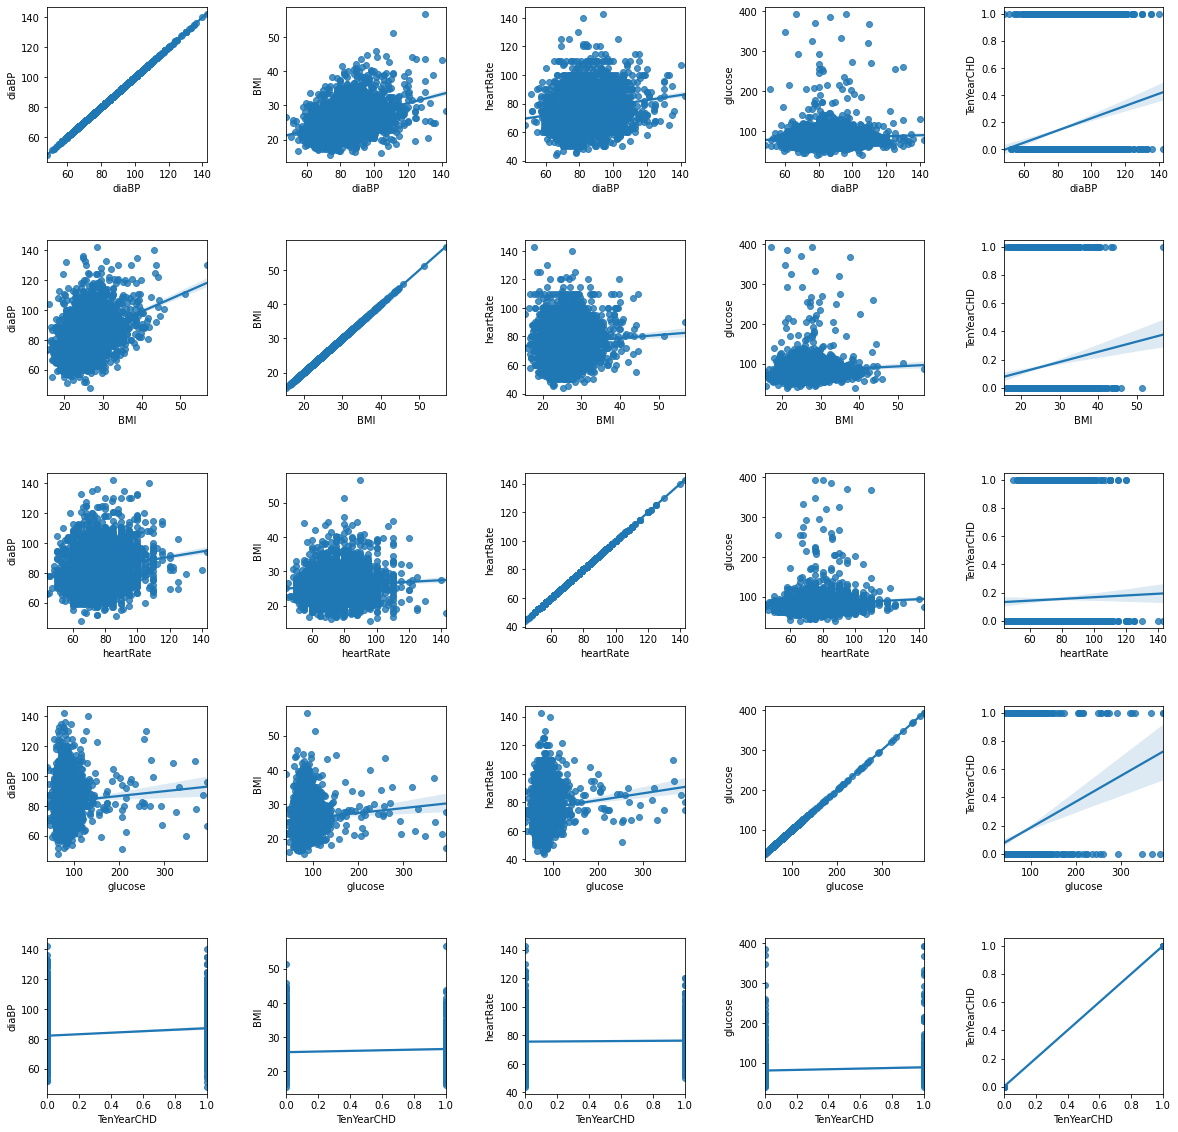

In [25]:
# Relation between totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
plt.figure(figsize=(20,20))
n=0
for x in ['diaBP','BMI','heartRate','glucose','TenYearCHD']:
    for y in ['diaBP','BMI','heartRate','glucose','TenYearCHD']:
        n+=1
        plt.subplot(5,5,n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()